In [1]:
from bs4 import BeautifulSoup
import requests
import pandas as pd

In [2]:
url= 'https://www.the-numbers.com/home-market/distributors'
response = requests.get('https://www.the-numbers.com/home-market/distributors')
soup = BeautifulSoup(response.text, 'lxml')
art_body= soup.find_all('table', id = 'page_filling_chart')
for body in art_body:
    print(art_body.text)

In [3]:
response.status_code

200

In [4]:
df_list = pd.read_html(response.text) 
df_home = df_list[0]
df_home.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 3 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Home Market Distributors            614 non-null    object
 1   No. of Movies                       614 non-null    int64 
 2   Total Domestic Home Market Revenue  614 non-null    object
dtypes: int64(1), object(2)
memory usage: 14.5+ KB


In [5]:
df_home.head()

,Home Market Distributors,No. of Movies,Total Domestic Home Market Revenue
0,Walt Disney Home Entertainment,388,"$10,723,810,487"
1,Universal Home Entertainment,1236,"$9,480,962,035"
2,Warner Home Video,962,"$9,289,947,358"
3,Fox Home Entertainment,857,"$8,862,951,476"
4,Sony Pictures Home Entertainment,1300,"$7,646,065,095"


In [6]:
df_home.columns

Index(['Home Market Distributors', 'No. of Movies',
       'Total Domestic Home Market Revenue'],
      dtype='object')

In [7]:
df_home.isna().sum()

Home Market Distributors              0
No. of Movies                         0
Total Domestic Home Market Revenue    0
dtype: int64

In [8]:
def money_str_int(str):
    number = int(str.strip('$').replace(',',''))
    return number

In [9]:
df_home['Total Domestic Home Market Revenue'] = df_home['Total Domestic Home Market Revenue'].str.replace('$', '')
df_home['Total Domestic Home Market Revenue'] = df_home['Total Domestic Home Market Revenue'].str.replace(',', '')
df_home['Total Domestic Home Market Revenue'] = df_home['Total Domestic Home Market Revenue'].astype(float)
df_home.head()

,Home Market Distributors,No. of Movies,Total Domestic Home Market Revenue
0,Walt Disney Home Entertainment,388,1.072381e+10
1,Universal Home Entertainment,1236,9.480962e+09
2,Warner Home Video,962,9.289947e+09
3,Fox Home Entertainment,857,8.862951e+09
4,Sony Pictures Home Entertainment,1300,7.646065e+09


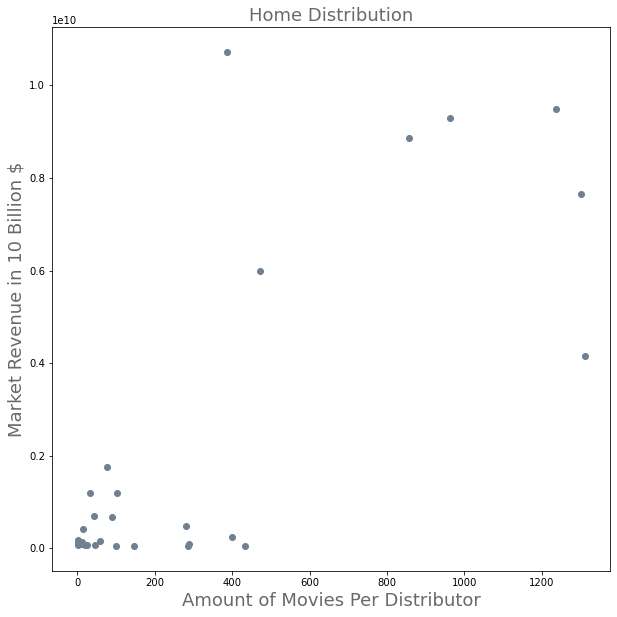

In [10]:
#import libraries
import matplotlib.pyplot as plt
import numpy as np

# apply size restictions
plt.figure(figsize=(10,10))

# create data
y= (df_home.loc[0:30, 'Total Domestic Home Market Revenue']) 
x = (df_home.loc[0:30, 'No. of Movies'])

r = range(len('Total Domestic Home Market Revenue'))


 
# use the scatter function
plt.scatter( x, y, color= 'slategrey')
plt.title("Home Distribution", fontsize=18, fontweight=0, color='dimgrey')
plt.xlabel("Amount of Movies Per Distributor", fontsize=18, fontweight=0, color='dimgrey')
plt.ylabel("Market Revenue in 10 Billion $", fontsize=18, fontweight=0, color='dimgrey')
plt.savefig('images/home_distribution_chart.png', dpi=300)
plt.show()


In [11]:
#define webiste url and get content
url = 'https://www.the-numbers.com/market/distributors'
r = requests.get(url)
soup = BeautifulSoup(r.content)

In [12]:
#clean up the html code
soup.prettify

<bound method Tag.prettify of <!DOCTYPE html>
<html xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://ogp.me/ns#">
<head>
<!-- Global site tag (gtag.js) - Google Analytics -->
<script async="" src="https://www.googletagmanager.com/gtag/js?id=UA-1343128-1"></script>
<script>
  window.dataLayer = window.dataLayer || [];
  function gtag(){dataLayer.push(arguments);}
  gtag('js', new Date());

  gtag('config', 'UA-1343128-1');
</script>
<meta content='(PICS-1.1 "https://www.icra.org/ratingsv02.html" l gen true for "https://www.the-numbers.com/" r (cb 1 lz 1 nz 1 oz 1 vz 1) "https://www.rsac.org/ratingsv01.html" l gen true for "https://www.the-numbers.com/" r (n 0 s 0 v 0 l 0))' http-equiv="PICS-Label"/>
<!--<meta http-equiv="Content-Type" content="text/html; charset=ISO-8859-1" >-->
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="telephone=no" name="format-detection"/> <!-- for apple mobile -->
<meta content="521546213" property="fb:admins"/>